# Introduction 
This notebook focuses on the Mall_Customers dataset, which contains information about 200 customers from a shopping mall. The dataset includes five columns: customer ID, gender, age, annual income, and spending score.
## Goal 
The primary goal of this notebook is to segment customers into distinct groups using clustering techniques such as KMeans and Hierarchical Clustering.
## Approch
To identify the optimal number of clusters, methods like the elbow curve,and dendrogram threshold have been applied.


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [9]:
data=pd.read_csv('Mall_Customers.csv')

## Step1 data basic information 

In [11]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


## Step2 EDA and Data visualization

In [15]:
print('Data describe:')
print(data.describe())
print('missing data:')
print(data.isnull().sum())
print('gender ratio:')
print(data['Gender'].value_counts())

Data describe
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000
missing data
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
gender ratio
Gender
Female    112
Male       88
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


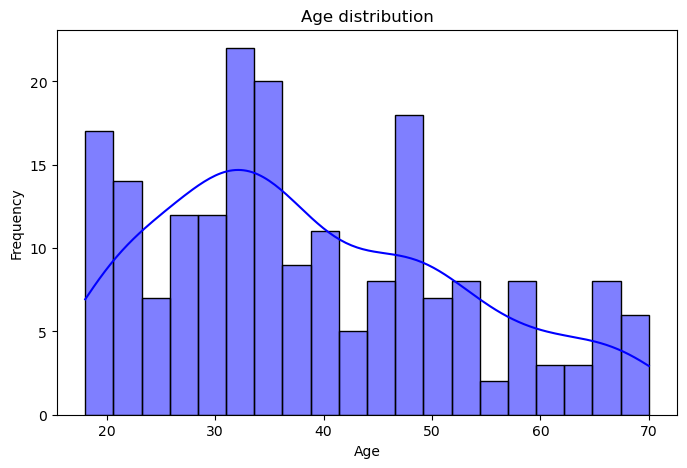

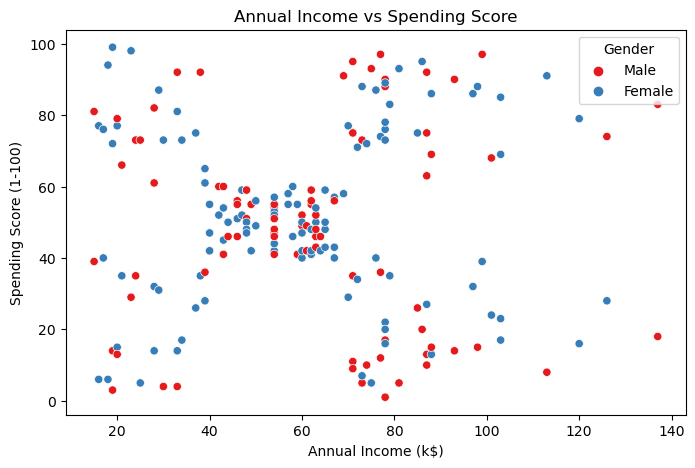

In [29]:
#data visualization
#Visualize age distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Age'],kde=True,bins=20,color='blue')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#visualize the relationship between annual income and spending socre
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Gender',palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title="Gender")
plt.show()


I segment the population into the following four categories: 1.High Income - High Spending Customers 2.Low Income - Low Spending Customers 3.High Income - Low Spending Customers 4.Low Income - High Spending Customers

## Step3 data preprocessing and cleaning 

In [38]:
#Encoding categorical variables,covert the Gender in to numerical format 
label_encoder=LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])
print(data.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       1   19                  15                      39
1           2       1   21                  15                      81
2           3       0   20                  16                       6
3           4       0   23                  16                      77
4           5       0   31                  17                      40


In [114]:
#Feature Selection
features=data[['Annual Income (k$)', 'Spending Score (1-100)']]
print("\nSelected features for clustering:")
print(features.head())


Selected features for clustering:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [116]:
## Standardize all numerical features
scaler=StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Standardized features:")
print(scaled_features[:5])

Standardized features:
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


## Step4 Model Selection and Training

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

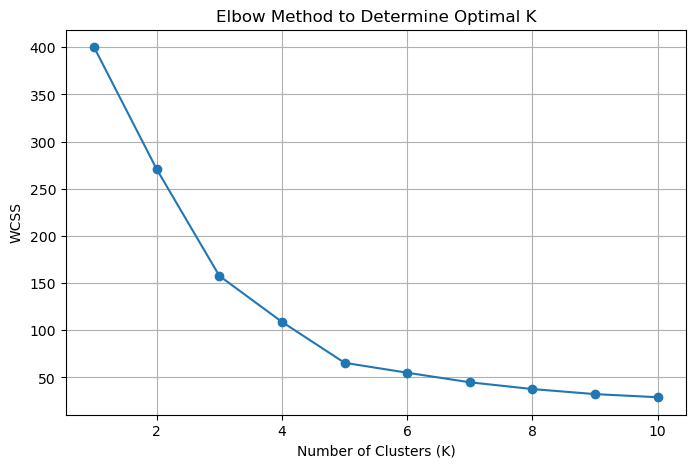

In [118]:
# Using Elbow Method to find the optiaml number of clusters
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

#plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11),wcss,marker='o')
plt.title("Elbow Method to Determine Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

From the above graph,it can observed that:
1.when k increases from 1 to 5,the WCSS decreases significantly.
2.Starting from k=5,the rate of decrease in WCSS gradually diminishes,and the curve begins to level off.

In [157]:
# Training K-Means with the optimal number of clusters =5
optimal_clusters=5
kmeans_5=KMeans(n_clusters=optimal_clusters,init='k-means++',random_state=42)
data['Cluster_kmeans']=kmeans_5.fit_predict(scaled_features)

print('\ncluster labels assigned to each customer')
print(data[['CustomerID','Cluster_kmeans']].head(10))


cluster labels assigned to each customer
   CustomerID  Cluster_kmeans
0           1               2
1           2               3
2           3               2
3           4               3
4           5               2
5           6               3
6           7               2
7           8               3
8           9               2
9          10               3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


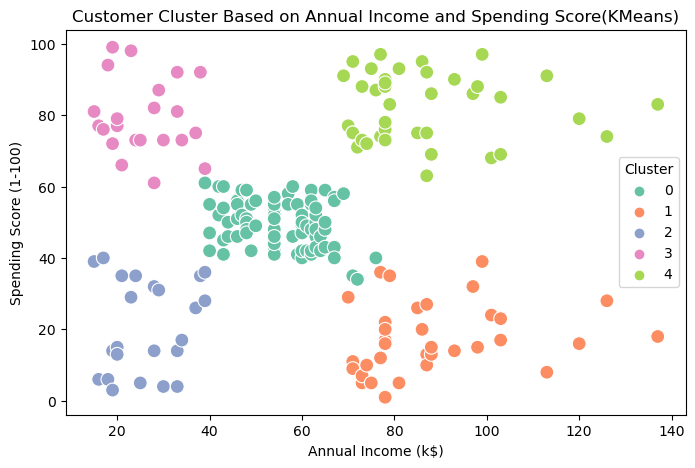

In [161]:
# scatter plot for clustering results
plt.figure(figsize=(8,5))
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Cluster',palette='Set2',s=100)
plt.title('Customer Cluster Based on Annual Income and Spending Score(KMeans)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

## Step5 Summarize the behaioral pattern of customer clusters

In [99]:
#calculate the mean values of features for each clsuter 
Cluster_summary=data.groupby('Cluster').mean()
print('\nCluster Summary')
print(Cluster_summary)


Cluster Summary
         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         83.872340  0.425532  55.638298           54.382979   
1        161.025000  0.450000  32.875000           86.100000   
2         55.648148  0.407407  25.185185           41.092593   
3         24.100000  0.400000  46.250000           26.750000   
4        159.743590  0.512821  39.871795           86.102564   

         Spending Score (1-100)  cluster  Cluster_Optimized  Cluster_4  
Cluster                                                                 
0                     48.851064      0.0                0.0   3.000000  
1                     81.525000      1.0                1.0   1.000000  
2                     62.240741      2.0                2.0   2.000000  
3                     18.350000      3.0                3.0   2.850000  
4                     19.358974      4.0                4.0   0.076923  


# Propose strategy recommendations based on culstering results:

# Cluster 0 (Moderate Income - Moderate Spending)
Description: Customers with moderate income and moderate spending behavior.

Strategy:
Focus on retaining these customers by offering personalized promotions or loyalty programs.
Provide incentives to increase their spending levels, such as tiered discounts or reward points for frequent purchases.

# Cluster 1 (High Income - High Spending)
Description: High-income customers with high spending behavior. This cluster represents the most valuable customer segment.

Strategy:
Invest in loyalty programs to retain these customers, such as premium memberships or exclusive benefits.
Provide personalized shopping experiences, including early access to new collections or VIP events.
Encourage referrals by offering attractive rewards for bringing in new customers.

# Cluster 2 (Low Income - Low Spending)
Description: Customers with low income and low spending behavior. This group has limited potential for higher spending.

Strategy:
Minimize marketing investment for this group but maintain basic engagement through automated and cost-effective communication, such as email campaigns.
Explore opportunities for cross-selling or bundling lower-cost products to slightly increase spending.
Use value-driven promotions to retain a basic level of activity.

# Cluster 3 (Low Income - High Spending)
Description: Customers with low income but high spending behavior. These customers are highly active despite limited income.

Strategy:
Offer value-based deals to maintain their spending frequency.
Provide targeted promotions, such as discounts, cashback, or loyalty rewards to encourage sustained activity.
Highlight budget-friendly products that align with their spending patterns.

# Cluster 4 (High Income - Low Spending)
Description: High-income customers who currently spend less, representing untapped potential.

Strategy:
Launch campaigns to encourage spending, such as limited-time offers or promotions for premium or luxury products.
Use data insights to better understand their preferences and provide tailored recommendations.
Offer personalized incentives like exclusive discounts or premium services to activate their spending.


## Step6 Hierarchial Model


In [141]:
# StandarScaler 
Hierarchial_scaled=pd.DataFrame(scaler.fit_transform(features))
print(Hierarchial_scaled.head())

          0         1
0 -1.738999 -0.434801
1 -1.738999  1.195704
2 -1.700830 -1.715913
3 -1.700830  1.040418
4 -1.662660 -0.395980


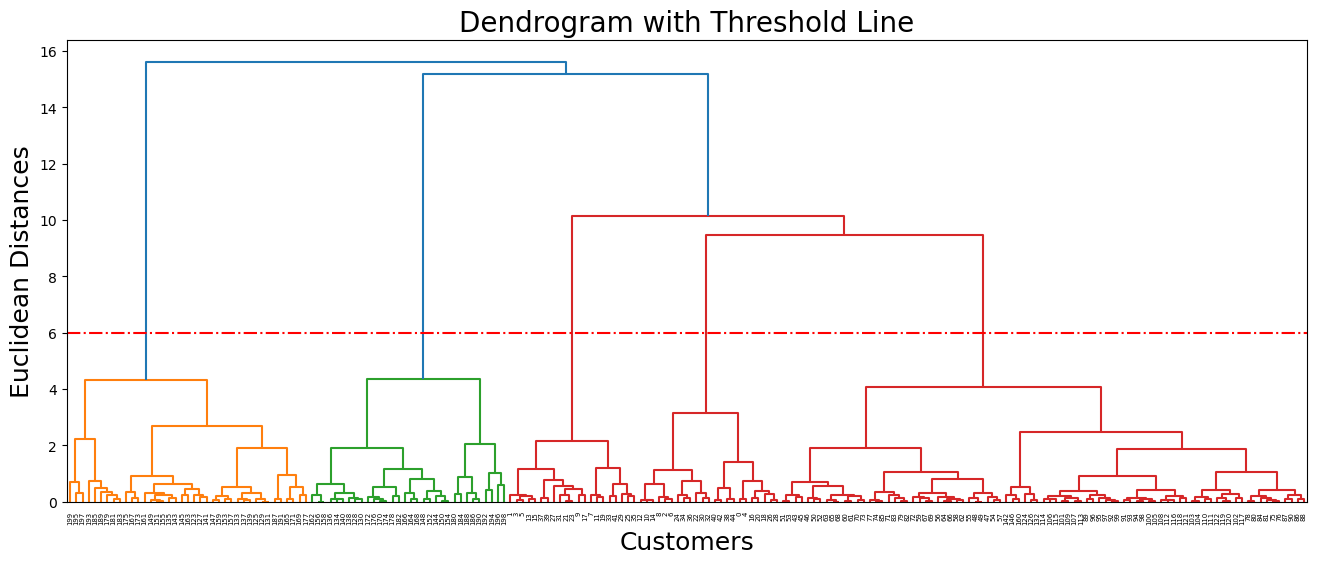

In [163]:
# Draw Dendrogram to identify the ideal number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16,6))
dendrogram=shc.dendrogram(shc.linkage(Hierarchial_scaled,method='ward'))
plt.axhline(y=6,color='r',linestyle='dashdot')
plt.title('Dendrogram with Threshold Line',fontsize=20)
plt.xlabel('Customers',fontsize=18)
plt.ylabel('Euclidean Distances',fontsize=18)
plt.show()

In [155]:
# Building hierarchial model 
from sklearn.cluster import AgglomerativeClustering

hierarchical_5 = AgglomerativeClustering(
    n_clusters=5,        
    affinity='euclidean',
    linkage='ward'       
)
data['Cluster_Hierachical']=hierarchical_5.fit_predict(X_Hierarchial)

print(data[['CustomerID','Cluster_Hierachical']].head(10))

   CustomerID  Cluster_Hierachical
0           1                    4
1           2                    3
2           3                    4
3           4                    3
4           5                    4
5           6                    3
6           7                    4
7           8                    3
8           9                    4
9          10                    3


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


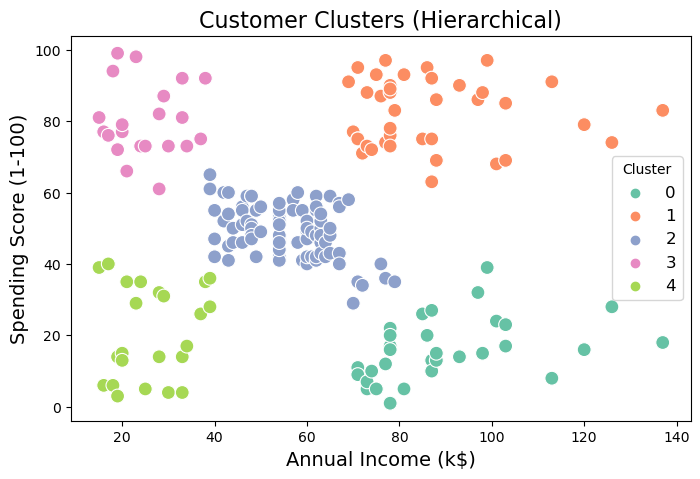

In [165]:
# scatter plot for hierarchical result
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'], hue=data['Cluster_Hierachical'], palette='Set2', s=100)
plt.title('Customer Clusters (Hierarchical)',fontsize=16)
plt.xlabel('Annual Income (k$)',fontsize=14)
plt.ylabel('Spending Score (1-100)',fontsize=14)
plt.legend(title='Cluster',fontsize=12)
plt.show()

# Comparing 2 scatter plots

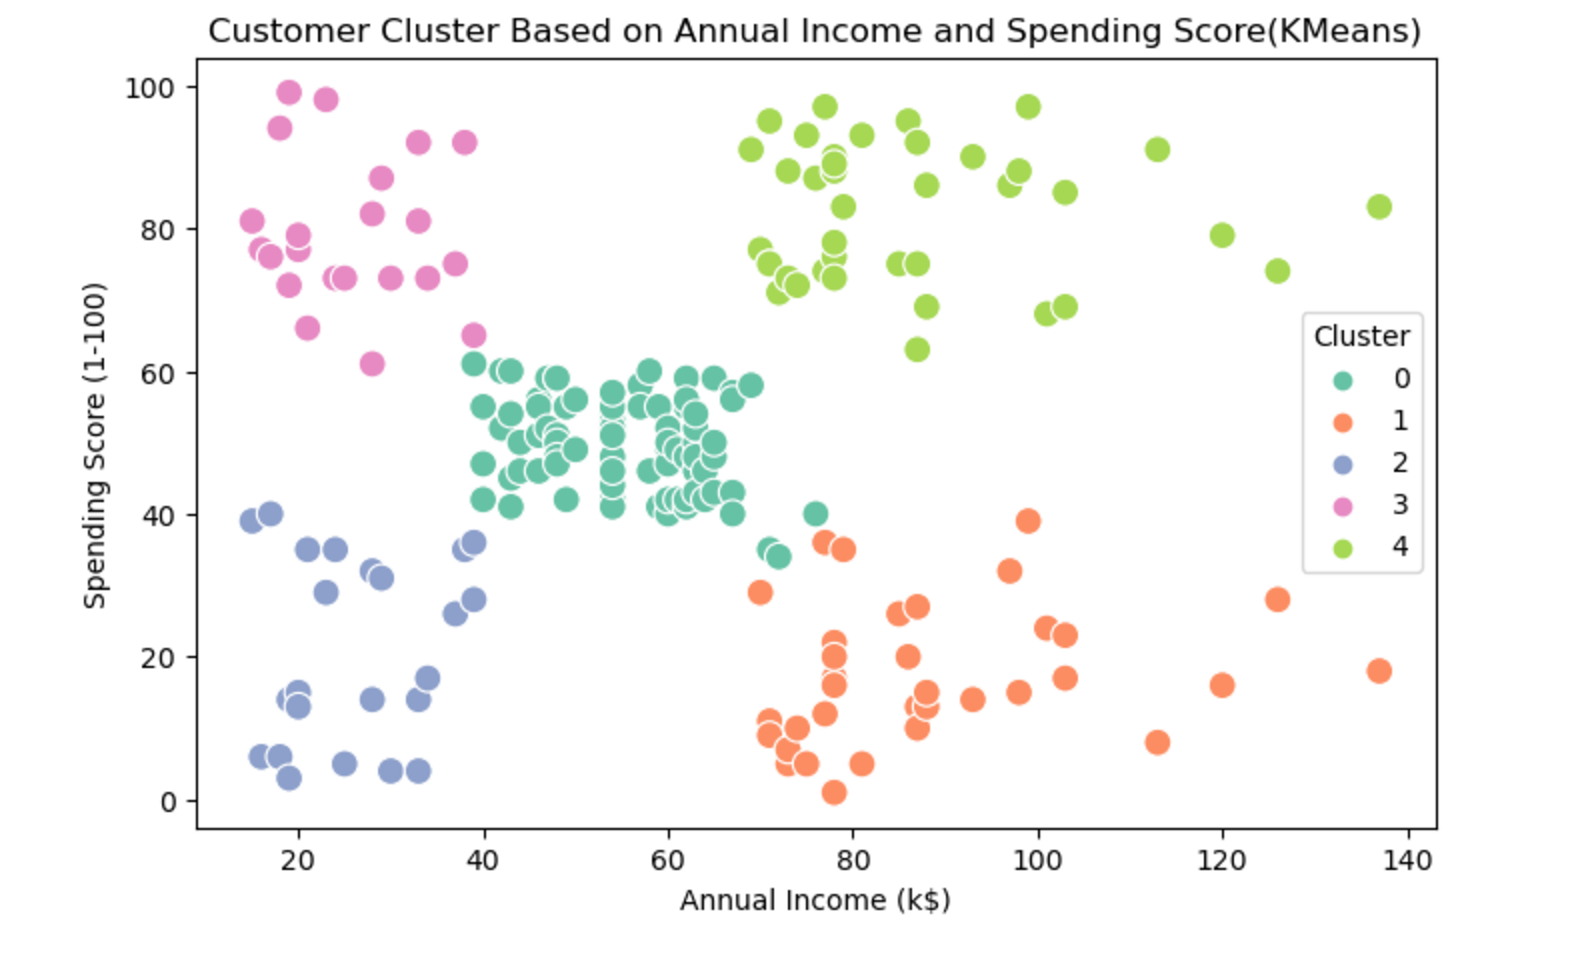                                           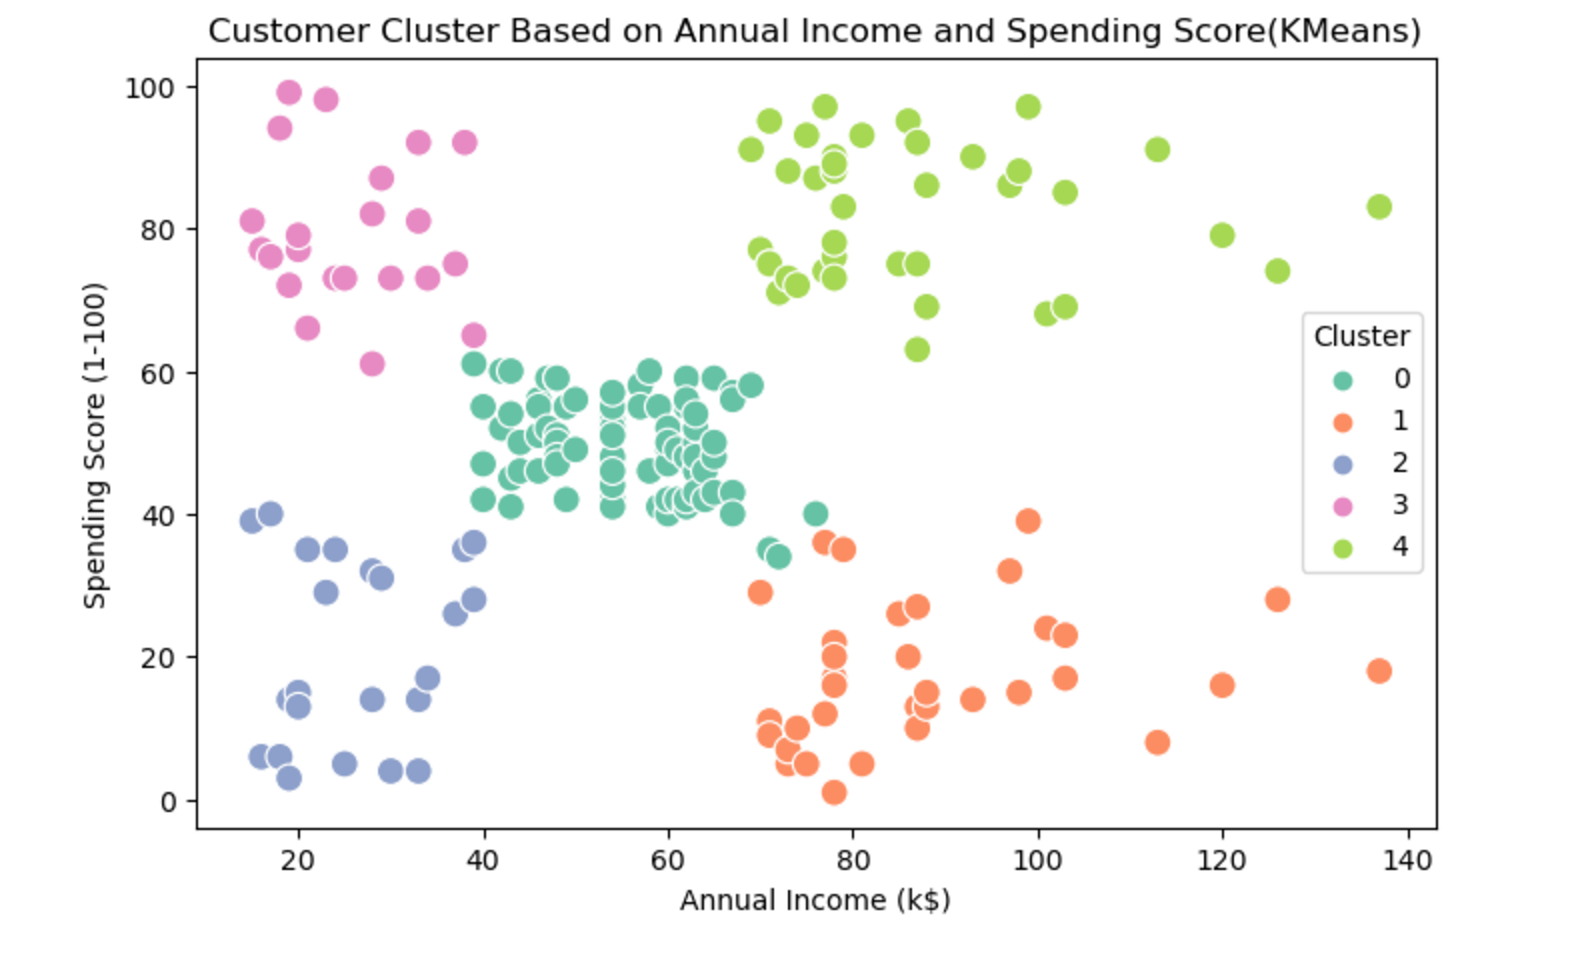

# Conclusion:
The results indicate that the outcomes of both the K-Means and Hierarchical Clustering methods are consistent.

Business Impact:
        
    Helps businesses design targeted strategies for high-value groups.
    Informs resource allocation for marketing efforts.

Future Work:
    
    Explore advanced clustering methods like Gaussian Mixture Models (GMM).
    Incorporate additional features for richer insights.
